In [1]:
import pandas as pd
from gensim.models import Word2Vec
import gensim.downloader as api
import csv
import random
import nltk
from nltk import sent_tokenize, word_tokenize
import os
import matplotlib.pyplot as plt

In [2]:
# Methods
def select_answer(model, question, choice1, choice2, choice3, choice4):
    choices = [choice1, choice2, choice3, choice4]
    if choice1 in model:
        choice1_similarity = model.similarity(question, choice1)
    else:
        choice1_similarity = 0
    
    if choice2 in model:
        choice2_similarity = model.similarity(question, choice2)
    else:
        choice2_similarity = 0
    
    if choice3 in model:
        choice3_similarity = model.similarity(question, choice3)
    else:
        choice3_similarity = 0
    
    if choice4 in model:
        choice4_similarity = model.similarity(question, choice4)
    else:
        choice4_similarity = 0
    
    similarity = [choice1_similarity, choice2_similarity, choice3_similarity, choice4_similarity]
    
    answer = similarity.index(max(similarity))
    final_choice = choices[answer]
    return final_choice

def random_guess(choice1, choice2, choice3, choice4):
    choices = [choice1, choice2, choice3, choice4]
    return choices[random.randint(0,3)]

def create_model_details(model_name):
    with open(model_name, 'w+') as f:
        writer = csv.writer(f)
        field = ['question', 'answer', 'guess', 'label']
        writer.writerow(field)

def test_model(model_name, model, questions, answers, choice1, choice2, choice3, choice4):
    correct_guesses = 0
    random_guesses = 0

    for i in range(len(questions)):
        question = questions[i]
        answer = answers[i]
        
        if question in model and (choice1[i] in model or choice2[i] in model or choice3[i] in model or choice4[i] in model):
            choice = select_answer(model, question, choice1[i], choice2[i], choice3[i], choice4[i])
            if choice == answer:
                correct_guesses += 1
                label = 'correct'
            else:
                label = 'wrong'
        else: 
            choice = random_guess(choice1[i], choice2[i], choice3[i], choice4[i])
            random_guesses += 1
            label = 'guess'
        
        with open(model_name, 'a') as f:
            writer = csv.writer(f)
            row = [question, answer, choice, label]
            writer.writerow(row)
    return correct_guesses, random_guesses

def write_model_analysis(model_name, size_of_vocab, number_of_correct, number_of_non_random_guess, accuracy):
    with open('analysis.csv', 'a') as f:
        writer = csv.writer(f)
        row = [model_name, size_of_vocab, number_of_correct, number_of_non_random_guess, accuracy]
        writer.writerow(row)

def getAnalytics(model_name, model, correct_guesses, random_guesses, questions):
    size = len(model.key_to_index)
    number_of_correct = correct_guesses
    number_of_non_random_guess = len(questions) - random_guesses
    accuracy = correct_guesses / number_of_non_random_guess
    write_model_analysis(model_name, size, number_of_correct, number_of_non_random_guess, accuracy)

# Analysis
with open('analysis.csv', 'w+') as f:
    writer = csv.writer(f)
    field = ['model_name', 'size_of_vocab', 'number_of_correct', 'number_of_non_random_guess', 'accuracy']
    writer.writerow(field)

### Task 1 - Evaluation of the word2vec-google-news-300 Pre-trained Model

In [3]:
# Word2Vec gooogle news model
wv_google = api.load('word2vec-google-news-300')
file_name_0 = 'word2vec-google-news-300-details.csv'

In [4]:
# Get dataset
df = pd.read_csv('synonym.csv')
questions = df['question'].tolist()
answers = df['answer'].tolist()

choice1 = df['0'].tolist()
choice2 = df['1'].tolist()
choice3 = df['2'].tolist()
choice4 = df['3'].tolist()

In [5]:
# Crowd sourced Gold-Standard was 88.5 from 88.28 vs 88.57
human_accuracy = 88.5


#### 1. Guessing

In [6]:
# Model guessing the correct answers
create_model_details(file_name_0)
correct_guesses_google300, random_guesses_google300 = test_model(file_name_0, wv_google, questions, answers, choice1, choice2, choice3, choice4)

#### 2. Analysis

In [7]:
getAnalytics('word2vec-google-news-300', wv_google, correct_guesses_google300, random_guesses_google300, questions)

### Task 2 - Comparison with other pre-trained models

#### 1. 2 new models from different corpora but same embedding size

glove-twitter-200 <br>
glove-wiki-gigaword-300

In [8]:
glove_twitter200 = api.load('glove-twitter-200')
file_name_1 = 'glove-twitter-200-details.csv'

glove_wiki200 = api.load('glove-wiki-gigaword-200')
file_name_2 = 'glove-wiki-gigaword-200-details.csv'

In [9]:
# Glove twitter 200 model guessing and analytics
create_model_details(file_name_1)
correct_guesses_twitter200, random_guesses_twitter200 = test_model(file_name_1, glove_twitter200, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('glove-twitter-200', glove_twitter200, correct_guesses_twitter200, random_guesses_twitter200, questions)

In [10]:
# Glove wiki 200 model guessing and analytics
create_model_details(file_name_2)
correct_guesses_wiki200, random_guesses_wiki200 = test_model(file_name_2, glove_wiki200, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('glove-wiki-200', glove_wiki200, correct_guesses_wiki200, random_guesses_wiki200, questions)

#### 2. 2 new models with different embdedding size but same corpus

glove-twitter-50 <br>
glove-twitter-100

In [11]:
glove_twitter50 = api.load('glove-twitter-50')
file_name_3 = 'glove-twitter-50-details.csv'

glove_twitter100 = api.load('glove-twitter-100')
file_name_4 = 'glove-twitter-100-details.csv'

In [12]:
# Glove twitter 50 model guessing and analytics
create_model_details(file_name_3)
correct_guesses_twitter50, random_guesses_twitter50 = test_model(file_name_3, glove_twitter50, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('glove-twitter-50', glove_twitter50, correct_guesses_twitter50, random_guesses_twitter50, questions)

# Glove twitter 100 model guessing and analytics
create_model_details(file_name_4)
correct_guesses_twitter100, random_guesses_twitter100 = test_model(file_name_4, glove_twitter100, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('glove-twitter-100', glove_twitter100, correct_guesses_twitter100, random_guesses_twitter100, questions)

### Task 3 - Train own models

In [13]:
nltk.download('punkt')
books_folder = 'books/'
all_books = os.listdir(books_folder)
print(all_books)
# books = ['book1_theakkracase.txt', 'book2_aliceinwonderland.txt', 'book3_thepictureofdoriangray.txt', 'book4_theadventuresofsherlockholmes.txt', 'book5_thegreatgatsby.txt', 'book6_modestproposal.txt', 'book7_metamorphosis.txt', 'book8_williamshakespeare.txt', 'book9_winniethepooh.txt', 'book10_warandpeace.txt']
book_sentences = {}

for book in all_books:
    book_path = os.path.join(books_folder, book)
    with open(book_path, 'r', encoding='utf-8') as f:
        text = f.read()
        sentences = sent_tokenize(text)
        # print(sentences[0])
        book_sentences[book] = [word_tokenize(sentence.lower()) for sentence in sentences]


flat_list = [item for sublist in book_sentences.values() for item in sublist]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aykch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['book11_warandpeace.txt', 'book1_theakkracase.txt', 'book2_aliceinwonderland.txt', 'book3_thepictureofdoriangray.txt', 'book4_theadventuresofsherlockholmes.txt', 'book5_thegreatgatsby.txt', 'book6_modestproposal.txt', 'book7_metamorphosis.txt', 'book8_williamshakespeare.txt', 'book9_winniethepooh.txt']


In [14]:
# Different window size 5 and 10
model_5_100 = Word2Vec(flat_list, window=5, vector_size=100, workers=4)
model_10_100 = Word2Vec(flat_list, window=10, vector_size=100, workers=4)

file_name_5_100 = 'own_corpus_5_100.csv'
file_name_10_100 = 'own_corpus_10_100.csv'

# Own corpus window size 5 and 10 model guessing and analytics
# Corpus 5 100
create_model_details(file_name_5_100)
correct_guesses_5_100, random_guesses_5_100 = test_model(file_name_5_100, model_5_100.wv, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('own_corpus_5_100', model_5_100.wv, correct_guesses_5_100, random_guesses_5_100, questions)

#  Corpus 10 100
create_model_details(file_name_10_100)
correct_guesses_10_100, random_guesses_10_100 = test_model(file_name_10_100, model_10_100.wv, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('own_corpus_10_100', model_10_100.wv, correct_guesses_10_100, random_guesses_10_100, questions)

In [15]:
# Different embedding size 100 and 200
model_10_300 = Word2Vec(flat_list, window=10, vector_size=300, workers=4)
model_10_200 = Word2Vec(flat_list, window=10, vector_size=200, workers=4)

file_name_10_300 = 'own_corpus_10_300.csv'
file_name_10_200 = 'own_corpus_10_200.csv'

# Own corpus embedding size 300 and 200 model guessing and analytics
# Corpus 10 300
create_model_details(file_name_10_300)
correct_guesses_10_300, random_guesses_10_300 = test_model(file_name_10_300, model_10_300.wv, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('own_corpus_10_300', model_10_300.wv, correct_guesses_10_300, random_guesses_10_300, questions)

# Corpus 10 200
create_model_details(file_name_10_200)
correct_guesses_10_200, random_guesses_10_200 = test_model(file_name_10_200, model_10_200.wv, questions, answers, choice1, choice2, choice3, choice4)
getAnalytics('own_corpus_10_200', model_10_200.wv, correct_guesses_10_200, random_guesses_10_200, questions)

### Comparison of all models with Gold Standard and random baseline

In [16]:
# Get random baseline
random_correct = 0

for i in range(len(questions)):
    question = questions[i]
    answer = answers[i]
    choice = random_guess(choice1[i], choice2[i], choice3[i], choice4[i])
    if choice == answer:
        random_correct += 1

random_accuracy = random_correct / len(questions)


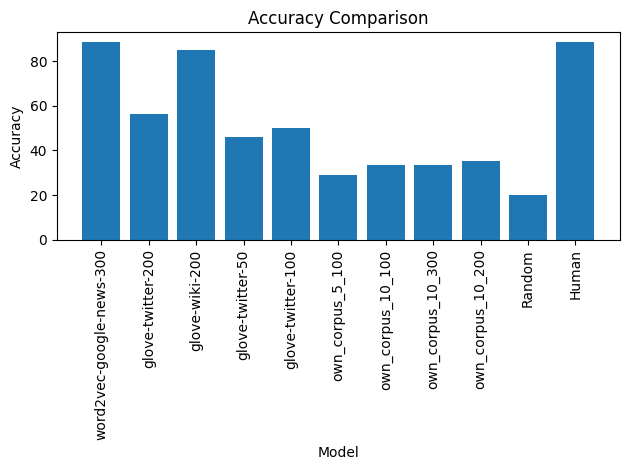

In [32]:
# Compare all models
analysis = pd.read_csv('analysis.csv')
all_accuracy = analysis['accuracy'].tolist()
model_name = analysis['model_name'].tolist()
all_accuracy.append(random_accuracy)
model_name.append('Random')

for i in range(len(all_accuracy)):
    all_accuracy[i] = all_accuracy[i] * 100

all_accuracy.append(human_accuracy)
model_name.append('Human')

plt.bar(model_name, all_accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Accuracies_Comparison.png')
plt.show()  
